# readme
jupyterlab from https://esgf-pyclient.readthedocs.io/en/latest/notebooks/demo/subset-cmip6.html

# Search CMIP6 Dataset with ESGF pyclient

In [ ]:
from pyesgf.search import SearchConnection
conn = SearchConnection('https://esgf-data.dkrz.de/esg-search', distrib=True) 
# url from https://esgf-pyclient.readthedocs.io/en/latest/api.html 

In [2]:
ctx = conn.new_context(
    project='CMIP6',
    source_id='UKESM1-0-LL',
    experiment_id='historical',
    variable='tas',
    frequency='mon',
    variant_label='r1i1p1f2',
    data_node='esgf-data3.ceda.ac.uk')
ctx.hit_count

1

In [3]:
result = ctx.search()[0]
result.dataset_id

'CMIP6.CMIP.MOHC.UKESM1-0-LL.historical.r1i1p1f2.Amon.tas.gn.v20190406|esgf-data3.ceda.ac.uk'

In [4]:
files = result.file_context().search()
for file in files:
    print(file.opendap_url)

http://esgf-data3.ceda.ac.uk/thredds/dodsC/esg_cmip6/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Amon/tas/gn/v20190406/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc
http://esgf-data3.ceda.ac.uk/thredds/dodsC/esg_cmip6/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Amon/tas/gn/v20190406/tas_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_195001-201412.nc


# Subset single dataset with xarray

In [5]:
import xarray as xr
ds = xr.open_dataset(files[0].opendap_url, chunks={'time': 120})
print(ds)

<xarray.Dataset>
Dimensions:    (time: 1200, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) object 1850-01-16 00:00:00 ... 1949-12-16 00:00:00
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(144, 2), meta=np.ndarray>
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(120, 144, 192), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:           144000.0
    creation_

In [6]:
da = ds['tas']
da = da.isel(time=slice(0, 1))
da = da.sel(lat=slice(-50, 50), lon=slice(0, 50))

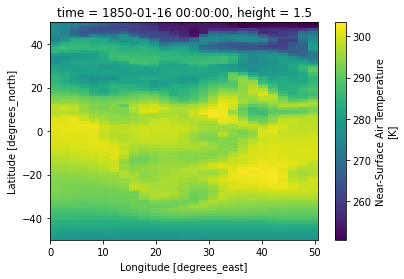

In [7]:
%matplotlib inline
da.plot()

# Subset over multiple datasets

In [8]:
ds_agg = xr.open_mfdataset([files[0].opendap_url, files[1].opendap_url], chunks={'time': 120}, combine='nested', concat_dim='time')
print(ds_agg)

<xarray.Dataset>
Dimensions:    (time: 1980, bnds: 2, lat: 144, lon: 192)
Coordinates:
  * time       (time) object 1850-01-16 00:00:00 ... 2014-12-16 00:00:00
  * lat        (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon        (lon) float64 0.9375 2.812 4.688 6.562 ... 355.3 357.2 359.1
    height     float64 1.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object dask.array<chunksize=(120, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(1200, 144, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(1200, 192, 2), meta=np.ndarray>
    tas        (time, lat, lon) float32 dask.array<chunksize=(120, 144, 192), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     CMIP
    branch_method:                   standard
    branch_time_in_child:            0.0
    branch_time_in_parent:         

In [9]:
da = ds_agg['tas']
da = da.isel(time=slice(1200, 1201))
da = da.sel(lat=slice(-50, 50), lon=slice(0, 50))

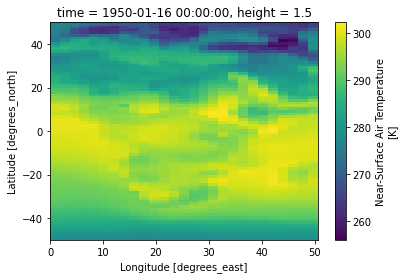

In [10]:
da.plot()

# Download datset

In [11]:
da.to_netcdf('tas_africa_19500116.nc')